# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

In [3]:
df=data.iloc[:,1:]
df.head(2)

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776

In [4]:
df.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [5]:
x=df.values
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()
Z=sc.fit_transform(x)
Z

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [8]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
n= acp.n_components_
coord

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [9]:
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) 
print("Les valeurs propres sont: ")
print([vp for vp in eigval])

Les valeurs propres sont: 
[2.644973572867684, 1.7025839715970164, 0.7400647738071876, 0.5637302251782901, 0.28567634404132103, 0.06297111250850261]


In [10]:
print("les ratios de variance expliquée:")
print([ratio for ratio in acp.explained_variance_ratio_])

les ratios de variance expliquée:
[0.44082892881128055, 0.2837639952661693, 0.12334412896786455, 0.09395503752971497, 0.04761272400688682, 0.010495185418083766]


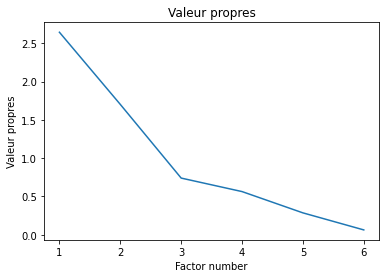

In [11]:
plt.plot(np.arange(1,n+1),eigval)
plt.title("Valeur propres")
plt.ylabel("Valeur propres")
plt.xlabel("Factor number")
plt.show()

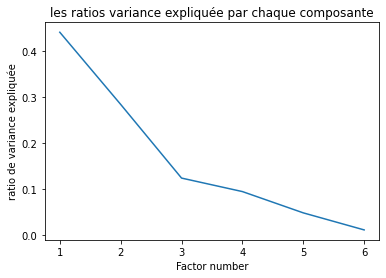

In [34]:
plt.plot(np.arange(1,n+1),acp.explained_variance_ratio_)
plt.title("les ratios variance expliquée par chaque composante")
plt.ylabel("ratio de variance expliquée")
plt.xlabel("Factor number")
plt.show()

44% d'informations sont conservés dans la dimension 1 et 28% d'informations sont conservés dans la dimension 2. Les deux dimensions conservent 72% d'informations. La quantité d'information préservée dans ce cas n'est pas très bien mais pas mal.

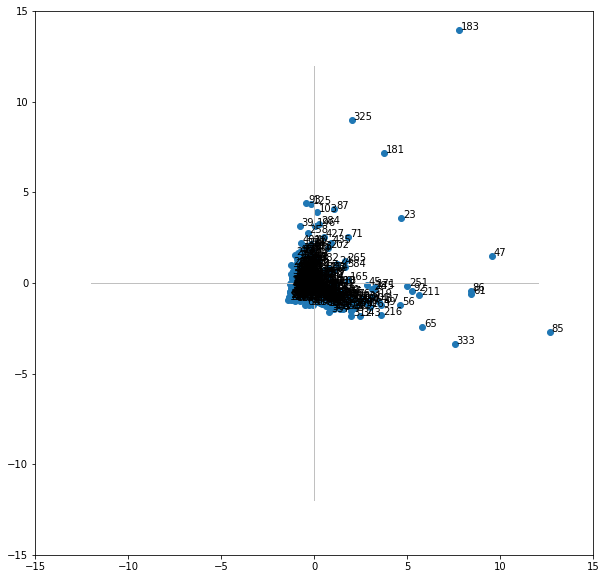

In [13]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-15,15)
axes.set_ylim(-15,15)
plt.scatter(coord[:,0],coord[:,1])
for i in range(440):
   plt.annotate(df.index[i],(coord[i,0]+0.1,coord[i,1]))
plt.plot([-12,12],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-12,12],color='silver',linestyle='-',linewidth=1) 
plt.show()

L'individu 183 est bien présenté sur l'axe 2. L'individu 85 est bien présenté sur l'axe 1.

In [14]:
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))

      ID        d_i
0      0   0.632268
1      1   0.566947
2      2   5.436559
3      3   1.283337
4      4   2.487360
..   ...        ...
435  435   8.093296
436  436   6.084971
437  437  13.899635
438  438   1.195152
439  439   2.082350

[440 rows x 2 columns]


In [15]:
#les qualités de représentation des individus
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.059091  0.147225
1      1  0.332872  0.190238
2      2  0.121024  0.122206
3      3  0.472434  0.332015
4      4  0.011117  0.649903
..   ...       ...       ...
435  435  0.093651  0.609412
436  436  0.133861  0.462130
437  437  0.864131  0.077791
438  438  0.705153  0.000755
439  439  0.586514  0.356281

[440 rows x 3 columns]


In [16]:
#les contributions de représentation des individus
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])
print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.001569  0.006075
1      1  0.007928  0.007039
2      2  0.027640  0.043358
3      3  0.025469  0.027807
4      4  0.001162  0.105496
..   ...       ...       ...
435  435  0.031840  0.321874
436  436  0.034218  0.183515
437  437  0.504567  0.070564
438  438  0.035403  0.000059
439  439  0.051306  0.048417

[440 rows x 3 columns]


In [17]:
acp.components_

array([[ 0.04288396,  0.54511832,  0.57925635,  0.05118859,  0.5486402 ,
         0.24868198],
       [ 0.52793212,  0.08316765, -0.14608818,  0.61127764, -0.25523316,
         0.50420705],
       [-0.81225657,  0.06038798, -0.10838401,  0.17838615, -0.13619225,
         0.52390412],
       [-0.23668559, -0.08718991,  0.10598745,  0.76868266,  0.17174406,
        -0.55206472],
       [-0.04868278,  0.82657929, -0.31499943, -0.02793224, -0.33964012,
        -0.31470051],
       [-0.03602539, -0.03804019,  0.72174458, -0.01563715, -0.68589373,
        -0.07513412]])

In [18]:
#les corrélations des variables avec chacun des axes
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((6,6))
for k in range(6):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                 id     COR_1     COR_2
0             Fresh  0.069744  0.688862
1              Milk  0.886546  0.108520
2           Grocery  0.942066 -0.190620
3            Frozen  0.083250  0.797614
4  Detergents_Paper  0.892274 -0.333036
5        Delicassen  0.404441  0.657905


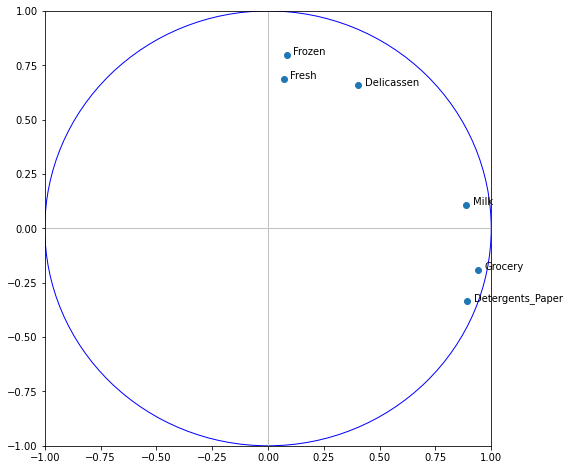

In [19]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
plt.scatter(corvar[:,0],corvar[:,1])
for j in range(6):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,1]))
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

Les variables Milk, Grocery et Detergents_Paper sont bien représentées sur les deux axes et sont corrélées aux premier axe. 

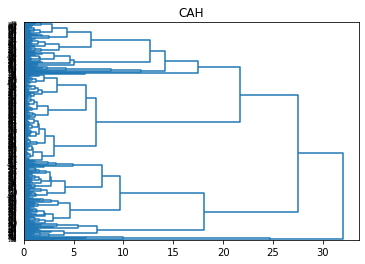

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
CAH = linkage(Z,method='ward',metric='euclidean')
plt.title("CAH")
dendrogram(CAH,labels=df.index,orientation='right',color_threshold=0)
plt.show()

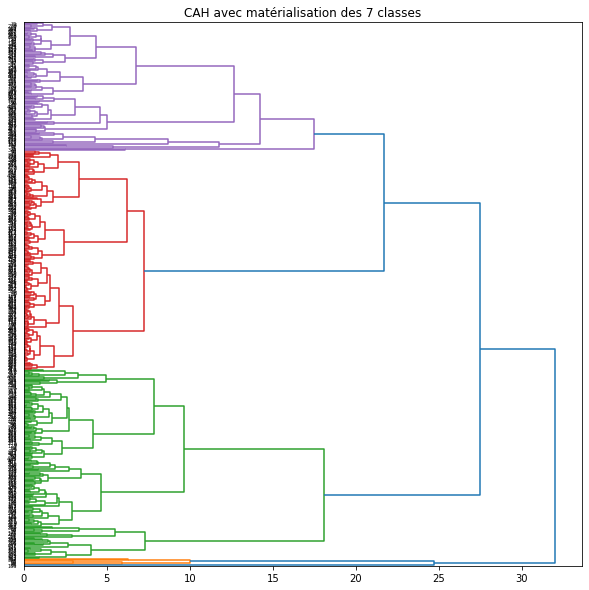

In [27]:
fig, axes = plt.subplots(figsize=(10,10))
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(CAH,labels=df.index,orientation='right',color_threshold=20)
plt.show()

In [28]:
groupes_cah = fcluster(CAH,t=20,criterion='distance')
print(groupes_cah)

[3 3 3 4 5 3 3 3 4 3 3 4 5 5 5 4 3 3 5 3 5 4 5 5 3 3 4 4 3 5 5 4 5 5 4 3 5
 3 3 5 5 5 3 3 3 3 3 1 3 3 4 4 5 3 5 4 3 3 4 3 3 1 3 3 4 3 3 5 4 4 5 5 4 5
 3 4 4 3 4 4 4 3 3 4 3 1 1 5 4 5 4 5 3 5 3 4 3 4 4 4 3 3 3 5 4 4 3 3 3 3 4
 3 5 4 4 4 4 4 4 4 4 4 4 3 5 5 5 5 3 5 4 4 4 4 4 4 3 3 5 4 5 5 5 4 3 3 4 4
 4 5 4 4 4 3 4 3 3 4 3 3 3 4 4 3 3 3 3 4 4 4 3 3 3 3 4 3 5 5 3 4 5 5 3 2 4
 3 4 3 3 3 5 4 4 3 4 5 5 3 4 4 3 3 3 4 4 3 4 3 3 3 5 3 4 3 3 3 3 4 3 4 4 3
 4 4 4 4 5 4 4 4 5 3 5 4 5 4 4 4 4 5 5 5 4 5 3 3 4 4 3 4 4 3 4 5 3 5 3 4 5
 5 4 4 5 4 3 3 3 5 3 4 4 4 3 5 4 4 5 5 4 5 4 3 5 5 5 5 4 5 4 5 4 4 4 3 5 4
 4 3 3 4 5 3 3 3 3 3 3 4 4 3 5 5 3 4 4 3 4 4 4 3 4 4 4 3 5 5 4 4 5 4 4 3 5
 1 5 5 4 4 5 4 3 3 3 3 4 3 3 5 4 3 4 3 4 3 5 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4
 5 5 3 5 4 4 3 5 4 3 5 5 5 4 3 4 4 4 4 4 4 4 4 5 4 4 3 4 4 4 4 5 5 5 4 4 5
 3 3 3 4 3 3 5 4 3 3 3 3 4 3 5 5 3 3 5 3 5 4 4 3 5 5 4 3 5 5 3 4 4]


In [30]:
idg = np.argsort(groupes_cah)
print(pd.DataFrame(df.index[idg],groupes_cah[idg]))

      0
1    47
1    61
1    85
1    86
1   333
..  ...
5   311
5   310
5   176
5   335
5   127

[440 rows x 1 columns]


Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH.

In [31]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(Z)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(df.index[idk],kmeans.labels_[idk]))

      0
0     0
0   270
0   269
0   267
0   263
..  ...
4    92
4    85
4   211
4   251
4    56

[440 rows x 1 columns]


Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)

In [32]:
pd.crosstab(groupes_cah,kmeans.labels_)

col_0    0   1   2  3  4
row_0                   
1        0   0   0  0  5
2        0   0   0  1  0
3       55   1  92  0  5
4      177   0   0  0  0
5       38  62   4  0  0